Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 02: Basic statistics

## Introduction

This week's sheet should be solved and handed in at 14:00 at **Tuesday, April 30, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet you will have to work with ```pandas``` and ```seaborn```. ```pandas``` is one of the most preferred and widely used tools in data processing. What’s cool about ```pandas``` is that it takes data (like a CSV or TSV file, or a SQL database) and creates a Python object with rows and columns called 'data frame' that looks very similar to tables in a statistical software (think Excel or SPSS for example). ```pandas``` makes data processing a lot easier in comparison to working with lists and/or dictionaries through for-loops or list comprehension.  
```seaborn``` is a library for making plots. It is based on ```matplotlib``` but offers more functions speicialized for statistical visualization. Also most people agree that ```seaborn``` looks more legit.

Don't forget that you we will also give **2 points** for nice coding style!

## Assignment 0: Peer review for sheet 01 [3 pts]

Beginning this week you will have to make a peer review of the other groups' solutions. Each group reviews the solutions of two other groups and give points according to the given point distribution considering the correctness of the solution. For this reviews the tutors will give you up to 3 points each week.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 10, 7 | 4, 9  | 1, 4  | 11, 1 | 8, 11 | 5, 3  | 9, 10 | 6, 5  | 3, 2  | 2, 8   | 7, 6   |

You should open an issue in repositories of groups you have to check. The title of the issue should be your group name (e.g."Group 1"). Comments on what was good and bad, how much points they get etc.  
Refer to https://guides.github.com/features/issues/ to learn more about issues.

## Assignment 1: Dataframes [4 pts]

In [2]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### a) Importing a csv file [2 pts]

```matplotlib``` and ```seaborn``` should already be installed in your environment. If not please run:
```sh
pip install seaborn
```

Import the csv files of all subjects into one dataframe. Make sure that each row has a unique index. You might want to take a look at what ***pandas.concat*** does.<br>
Extra fun: Display the output of the dataframe using the ***pandas.set_option*** function to display the data in a well-arranged way. Play a little bit around with the settings that you are allowed to change.<br>
Save ```df_concatenated```.


In [3]:
import os
from pathlib import Path

# Use the new, object-orientated Python paths rather than the old modules
# By this, we have both a convenient interface and no struggles with separators
PATH = Path.cwd() / "Data"

# Read all the experiments from the available CSV files and concatenate them.
# In oder of getting not n time indeces from 0-99, we reset the indices by ignore_index.
experiments = [pd.read_csv(file) for file in PATH.glob('*.csv')]
df_concatenated = pd.concat(experiments, ignore_index=True)

# Before showing an overview of the data, we optimize the formatting.
# We justify the headers to the right and limit the maximal about of printed rows further.
pd.set_option('colheader_justify', 'right')
pd.set_option('display.max_rows', 40)
print(df_concatenated)

# In the nex step, we save the concatenated dataframe.
# Therefore, we create the folder if it does not exist and (over-)write the CSV file.
DATAPATH = Path.cwd() / 'Processed' / 'data_concatenated.csv'
DATAPATH.parent.mkdir(exist_ok=True)
with DATAPATH.open(mode='w', newline='') as file:
    df_concatenated.to_csv(file)

     SubjectID  StimulusType  response   RT
0         2001             1         0    0
1         2001             0         0    0
2         2001             1         1  585
3         2001             1         1  615
4         2001             1         1  402
5         2001             0         0    0
6         2001             1         1  719
7         2001             1         1  551
8         2001             1         1  482
9         2001             1         1  483
10        2001             0         0    0
11        2001             1         1  368
12        2001             1         1  446
13        2001             1         1  497
14        2001             1         1  530
15        2001             1         1  633
16        2001             1         1  448
17        2001             1         1  435
18        2001             1         1  385
19        2001             1         1  369
..         ...           ...       ...  ...
780       2008             0    

### b) Working with dataframes [2 pts]

- Add a column called "congruence" to ```df_concatenated```. The column should have a value *True* if "StimulusType" and "reponse" matches. Otherwise the column should have a value *False*.

- Create a new dataframe which has "SubjectID","StiumulusType","RT" and "congruence" as a column. For each combination of "SubjectID" and "StimulusType" (e.g. "7001" and "0") compute the average RT and congruence level.

- When computing the average RT, omit all reaction times which are 0 as these will manipulate the mean.

- Rename "congruence" as "accuracy" and save the dataframe as a csv file. 

In [4]:
# We add a column "congruence".
# The assign function applies an anonymous function to all rows and save the result by the name of the argument
df_concatenated = df_concatenated.assign(congruence=lambda row: row.StimulusType == row.response)

# We create a new dataframe with averaged data
# Pandas works a bit like SQL:
#   1. First we filter for invalid reaction times ...
#   2. ... than we group the data by our columns of interest ...
#   3. ... and calculate the average.
df_concatenated_avg = df_concatenated[df_concatenated.RT > 0]\
    .groupby(['SubjectID', 'StimulusType'])\
    .mean()

# We rename "congruence" to "accuracy" inplace.
df_concatenated_avg.rename(index=str, columns={"congruence": "accuracy"}, inplace=True)

# Afterwards, we save the result into the already created folder.
DATAPATH = Path.cwd() / 'Processed' / 'data_concatenated_averaged.csv'
with DATAPATH.open(mode='w', newline='') as file:
    df_concatenated_avg.to_csv(file)

## Assignment 2: Statistical plotting [6 pts]

### a) Boxplot and Violinplot [2 pts]

Plot the RT of each trial for all subjects as a stripplot and a boxplot on top of each other. Do the same with a striplot and a violinplot. Plot go trials as green dots and no-go trails as red dots. Reminder: don't forget to mask the data where RT=0. Make sure that the legends are informative (Don't display duplicated legends).

C:\Users\sarah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


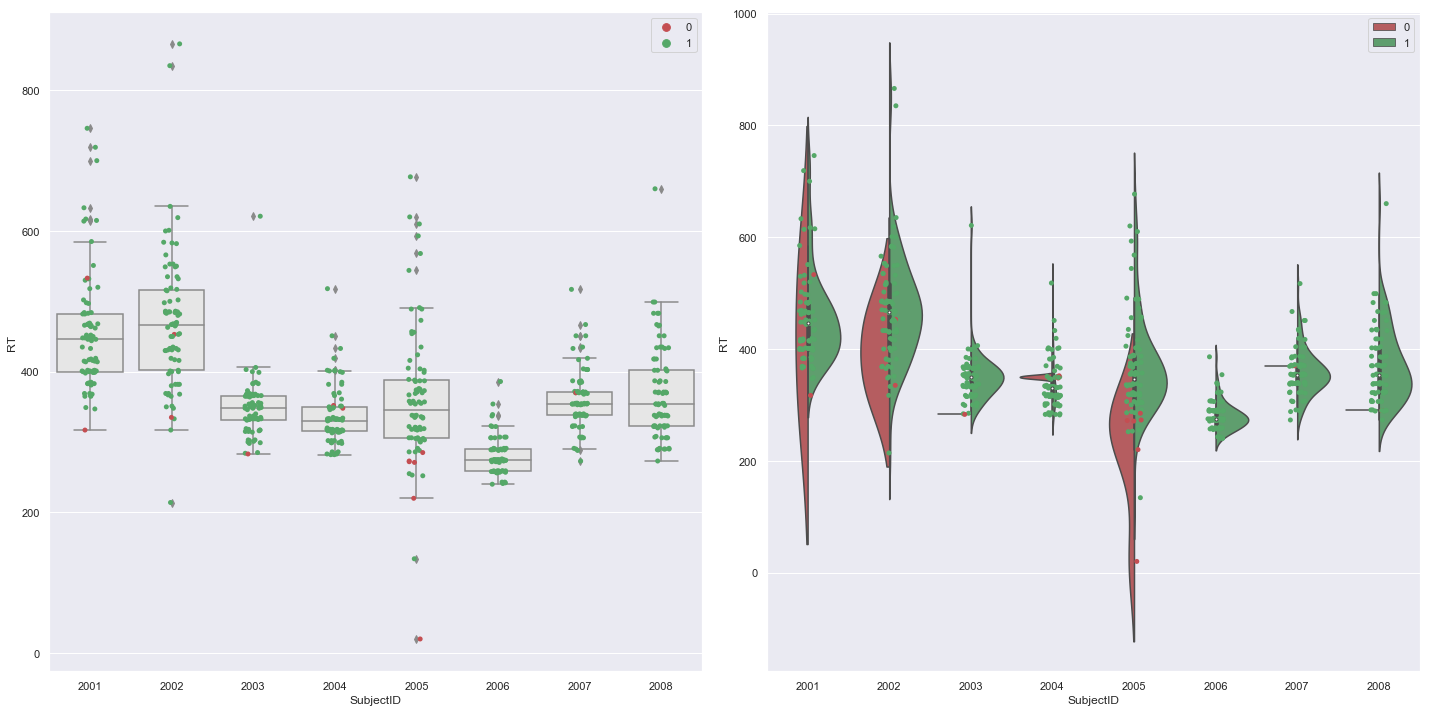

In [5]:
# read data
data_concat = pd.read_csv(os.getcwd() + "/Processed/data_concatenated.csv")

# create two axes
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))

# first subplot with stripplot and boxplot
#stripplot with data from group 2
sns.stripplot(data = data_concat.drop(data_concat[data_concat.RT == 0].index), 
              x='SubjectID', y='RT',
              hue='StimulusType',palette=["r", "g"], 
              ax=axes[0])
#boxplot
ax1 = sns.boxplot(data = data_concat.drop(data_concat[data_concat.RT == 0].index), 
                  x='SubjectID', y='RT', color='0.9',
                  ax=axes[0])

# second subplot with stripplot and violinplot
#stripplot
sns.stripplot(data = data_concat.drop(data_concat[data_concat.RT == 0].index), 
              x='SubjectID', y='RT', 
              hue='StimulusType',palette=["r", "g"],
              ax=axes[1])
#violinplot
ax2 = sns.violinplot(data = data_concat.drop(data_concat[data_concat.RT == 0].index), 
                     x='SubjectID', y='RT', 
                     hue='StimulusType',palette=["r", "g"], split=True, 
                     ax=axes[1])

# handling legends
#only keep one label to avoid duplicates
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels[0:2])

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels[0:2])

fig.tight_layout()

### b) Violinplot combining all data of all groups [3 pts]

- Make a dataframe consisting of all data across groups. You already did this in 1.a). At the end this dataframe you should have 8 * 11 * 100 rows.

- Every group has used their ID convention. Make sure that every data point follows this SubjectID system: group number + "00" + subject number.  
e.g) 3002 for the second subject of the third group.

- Compute average RT and accuaracy for each subject in the big dataframe you just created. You already did this in 1.b). At the end this dataframe will have 8 * 11 rows.

- On the first column plot average RT and accuracy for 8 subjects from your group's data. Use violinplot and split go/no-go conditions.

- On the second column plot average RT and accuracy for 80 subjects from all data. Use violinplot and split go/no-go conditions.

- Do you see any difference between the first column and the second column? What does this tell us about the central limit theorem (CLT) ?

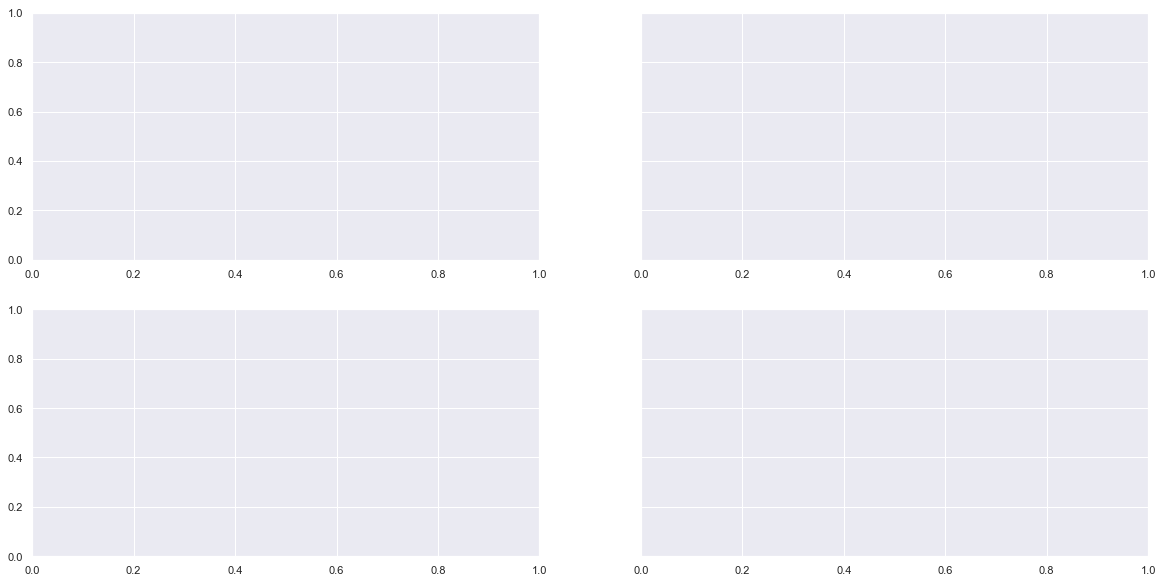

In [9]:
import re
# again create a concatenated dataframe over all (averaged) groups.
# Don't forget to modify the Subject ID
PATH = Path.cwd() / "Experimental_Data"
df_concatenated_list = []

# get the names of the Groupfolders
groupnames = os.listdir(PATH) 

# get the data from each Group
for folder in groupnames:
    PATH = Path.cwd() / "Experimental_Data" / folder
    experiments = [pd.read_csv(file) for file in PATH.glob('*.csv')]
    df_concatenated = pd.concat(experiments, ignore_index=True,sort=False)
    
    # change the SubjectID to one coherent notation Groupnumber+00+Subjectnumber 
    for i in range(1,9):
        for j in range(100):
            df_concatenated.loc[(i*100-100):, "SubjectID"] = re.findall(r'\d+', folder)[0] + '00' + str(i)
    
    df_concatenated_list.append(df_concatenated)

# create one big data frame 
df_all = pd.concat(df_concatenated_list, ignore_index = True,sort=False, axis = 0)

# add column accuracy 
df_all = df_all.assign(accuracy=lambda row: (row.StimulusType == row.response))

# sort the df according to SubjectId and Stimulustype and calculate the average RT
df_all_avg = df_all[df_all.RT > 0]\
    .groupby(['SubjectID', 'StimulusType'])\
    .mean()



# Now it's time to plot your results
figs, axes = plt.subplots(nrows=2, ncols=2, sharey="row", figsize=(20,10))

# violin plot for your group's data
# TODO

# violin plot of all group's data
# TODO


Compare two datasets and relate it with CLT. Write your opinion here.

### c) Scatterplot [1 pts]

Make a scatterplot comparing RT and accuracy. Do you see some correlation?

In [ ]:
# TODO